In [1]:
import numpy as np
import tensorflow as tf

def mandelbrot(z,maxiter):
    c = z
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return maxiter

def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1,r2,[mandelbrot(complex(r, i),maxiter) for r in r1 for i in r2])

In [2]:
#mandelbrot_set(-2.0,0.5,-1.25,1.25,1000,1000,80)

In [2]:
                                                                                        # Mandelbrot using tensorflow
# Source: https://tensorflow.googlesource.com/tensorflow/+/master/tensorflow/g3doc/tutorials/mandelbrot/index.md
# https://github.com/tobigithub/tensorflow-deep-learning/wiki

# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from cStringIO import StringIO
from IPython.display import clear_output, Image, display
import scipy.ndimage as nd

import math

def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (5.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = StringIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

sess = tf.InteractiveSession()

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

# Probably just emphasizing that Z is complex for tensorflow
xs = tf.constant(Z.astype("complex64"))
# We declare variables to be tf.Variable if they change during the course of computation
zs = tf.Variable(xs)
# ns is a tensor of zeros with same shape as xs
ns = tf.Variable(tf.zeros_like(xs, "float32"))

tf.initialize_all_variables().run()

### Mandelbrot:
# Compute the new values of z: z^2 + x
#zs_ = zs*zs + xs

### Collaz:
x1 = tf.cos(math.pi*zs)
x2 = 1+4*zs-(1+2*zs)*x1

zs_ = x2*0.25

# Have we diverged with this new value?
not_diverged = tf.complex_abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_), # Iterate sequences
  ns.assign_add(tf.cast(not_diverged, "float32"))
  )

for i in range(200): step.run()

#DisplayFractal(ns.eval())
ns.eval()

### END

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

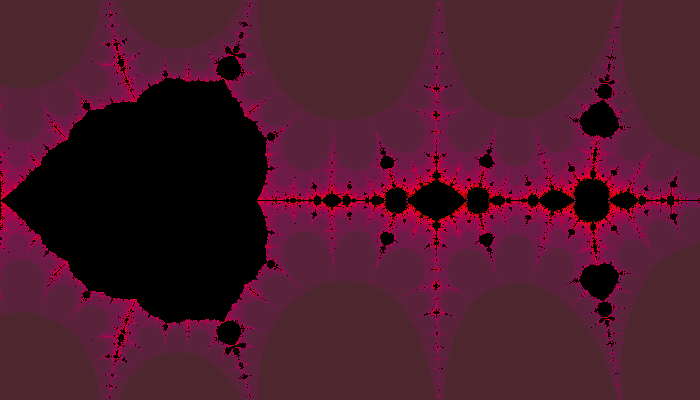

In [14]:
                                                                                        # Mandelbrot using tensorflow
# Source: https://tensorflow.googlesource.com/tensorflow/+/master/tensorflow/g3doc/tutorials/mandelbrot/index.md
# https://github.com/tobigithub/tensorflow-deep-learning/wiki


# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from cStringIO import StringIO
from IPython.display import clear_output, Image, display
import scipy.ndimage as nd

import math

def DisplayFractal(fractal, fmt='png'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  fractal_cyclic = (6.28*fractal/20.0).reshape(list(fractal.shape)+[1])
  img = np.concatenate([155-80*np.cos(fractal_cyclic),
                        10+30*np.cos(fractal_cyclic),
                        30+50*np.sin(fractal_cyclic)], 2)
  img[fractal==fractal.max()] = 0
  #fractal_image = img
  fractal_image = np.uint8(np.clip(0, img, 255))
  f = StringIO()
  PIL.Image.fromarray(fractal_image).save(f, fmt)
  display(Image(data=f.getvalue()))

sess = tf.InteractiveSession()

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]

## ATH COMPUTER VISION eru asnar

# Different zooms:
Y,X = np.mgrid[-1:1:0.005, -1:2.5:0.005]

### Y,X = np.mgrid[-0.4:0.4:0.001, 0.1:1.25:0.001]

### Y,X = np.mgrid[-1:1:0.0025, 3:6:0.0025]

### Y,X = np.mgrid[-0.25:0.25:0.00125, 0.3:1:0.00125]


Z = X+1j*Y

# Probably just emphasizing that Z is complex for tensorflow
xs = tf.constant(Z.astype("complex64"))
# We declare variables to be tf.Variable if they change during the course of computation
zs = tf.Variable(xs)
# ns is a tensor of zeros with same shape as xs
ns = tf.Variable(tf.zeros_like(xs, "float32"))

tf.initialize_all_variables().run()

### Mandelbrot:
# Compute the new values of z: z^2 + x
#zs_ = zs*zs + xs

### Collaz:
x1 = tf.cos(math.pi*zs)
x2 = 1+4*zs-(1+2*zs)*x1

zs_ = x2*0.25

# Have we diverged with this new value?
not_diverged = tf.complex_abs(zs_) < 50

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_), # Iterate sequences
  ns.assign_add(tf.cast(not_diverged, "float32"))
  )

for i in range(200): step.run()

DisplayFractal(ns.eval())
#x=ns.eval()
#print x

### END

numpy.ndarray

In [66]:
x_cycle=(6.28*x/20.0).reshape(list(x.shape)+[1])
img = np.concatenate([10+20*np.sin(x_cycle),
                        30+50*np.cos(x_cycle),
                        155-80*np.cos(x_cycle)], 2)
img[x==x.max()] = 0
img[5][100:120]
x = img
np.uint8(np.clip(255, 2*x, 0))[5][100:120]

/home/arnbjorg/anaconda2/envs/Julia/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 2; dimension is 9 but corresponding boolean dimension is 3


<function cStringIO.StringIO>

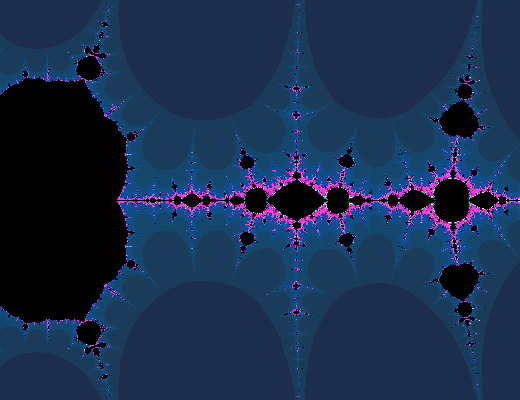

In [8]:
                                                                                        # Mandelbrot using tensorflow
# Source: https://tensorflow.googlesource.com/tensorflow/+/master/tensorflow/g3doc/tutorials/mandelbrot/index.md
# https://github.com/tobigithub/tensorflow-deep-learning/wiki

# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from cStringIO import StringIO
from IPython.display import clear_output, Image, display
import scipy.ndimage as nd

import math

def DisplayFractal(a, fmt='png'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, a, a))
  f = StringIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

sess = tf.InteractiveSession()

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]

## ATH COMPUTER VISION eru asnar
Y,X = np.mgrid[-1:1:0.005, -.3:2.3:0.005]
Z = X+1j*Y

# Probably just emphasizing that Z is complex for tensorflow
xs = tf.constant(Z.astype("complex64"))
# We declare variables to be tf.Variable if they change during the course of computation
zs = tf.Variable(xs)
# ns is a tensor of zeros with same shape as xs
ns = tf.Variable(tf.zeros_like(xs, "float32"))

tf.initialize_all_variables().run()

### Mandelbrot:
# Compute the new values of z: z^2 + x
#zs_ = zs*zs + xs

### Collaz:
x1 = tf.cos(math.pi*zs)
x2 = 1+4*zs-(1+2*zs)*x1

zs_ = x2*0.25

# Have we diverged with this new value?
not_diverged = tf.complex_abs(zs_) < 50

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_), # Iterate sequences
  ns.assign_add(tf.cast(not_diverged, "float32"))
  )

for i in range(500): step.run()

DisplayFractal(ns.eval())

### END